# NLTK PROCESS

## Dependances

In [243]:
import re
import os 
import sys
from urllib.request import urlopen
import requests
import pprint
import math


In [244]:
import nltk
from nltk import sent_tokenize
from nltk import word_tokenize
from nltk.grammar import DependencyGrammar
from nltk.parse import CoreNLPParser



In [245]:
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns

In [246]:
# from rich import print
from rich.console import Console
console=Console(record=True)

In [247]:
console.print(re.match('Jim','JimDowd'),style="bold black on white")

<re.Match object; span=(0, 3), match='Jim'>

## Get Data

### from file

In [248]:
with open("../data/t1.txt") as f:   
    text = f.read()
text

'what is pressure of nitrogen tank?\nwhat is max pressure in the hydrogen tank?\nwhat is max pressure of pump H-6?\ncurrent pressure of nitrogen tank.\ncurrent pressure of hydrogen tank.\n\n'

### from url

In [249]:
# url = "https://www.hq.nasa.gov/alsj/LM03_Apollo_Spacecraft_AS1-6.pdf"
# # html = urlopen(url).read()

# html= requests.get(url)


# text = BeautifulSoup(html.text, 'html.parser').get_text()
# text[:200]

## Text Pre-processing

### Sentence tokenizing:

In [250]:
sentences=sent_tokenize(text)
console.print(f'Number of sentences:{len(sentences)}')

console.print(sentences,style="bold blue on white")

Number of sentences:5

[
    'what is pressure of nitrogen tank?',
    'what is max pressure in the hydrogen tank?',
    'what is max pressure of pump H-6?',
    'current pressure of nitrogen tank.',
    'current pressure of hydrogen tank.'
]

### Word tokenizing

In [251]:
words=word_tokenize(text)
console.print(f'Number of words: {len(words)}')

print(words)

Number of words: 36

['what', 'is', 'pressure', 'of', 'nitrogen', 'tank', '?', 'what', 'is', 'max', 'pressure', 'in', 'the', 'hydrogen', 'tank', '?', 'what', 'is', 'max', 'pressure', 'of', 'pump', 'H-6', '?', 'current', 'pressure', 'of', 'nitrogen', 'tank', '.', 'current', 'pressure', 'of', 'hydrogen', 'tank', '.']


### Find the frequency distribution

In [252]:
from nltk import FreqDist

# Find the frequency
fdist= FreqDist(words)

fdist.most_common(10)

[('pressure', 5),
 ('of', 4),
 ('tank', 4),
 ('what', 3),
 ('is', 3),
 ('?', 3),
 ('nitrogen', 2),
 ('max', 2),
 ('hydrogen', 2),
 ('current', 2)]

### Plot the frequency graph

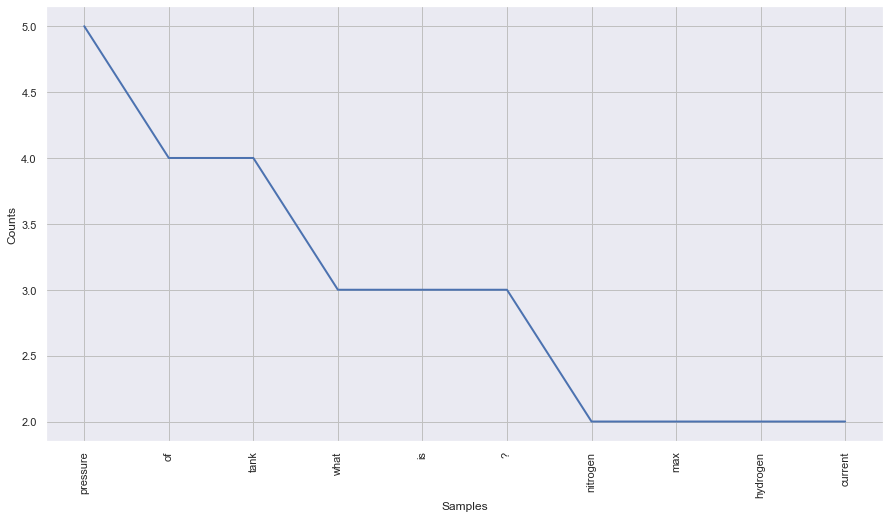

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [253]:
import matplotlib.pyplot as plt

fdist.plot(10)

### Remove punctuation marks

In [254]:

words_no_punc=[w for w in words if w.isalpha()==True]
print(words_no_punc[:50])
print(len(words_no_punc))

['what', 'is', 'pressure', 'of', 'nitrogen', 'tank', 'what', 'is', 'max', 'pressure', 'in', 'the', 'hydrogen', 'tank', 'what', 'is', 'max', 'pressure', 'of', 'pump', 'current', 'pressure', 'of', 'nitrogen', 'tank', 'current', 'pressure', 'of', 'hydrogen', 'tank']
30


### Plotting graph without punctuation marks

In [255]:
fdist=FreqDist(words_no_punc)
fdist.most_common(10)

[('pressure', 5),
 ('of', 4),
 ('tank', 4),
 ('what', 3),
 ('is', 3),
 ('nitrogen', 2),
 ('max', 2),
 ('hydrogen', 2),
 ('current', 2),
 ('in', 1)]

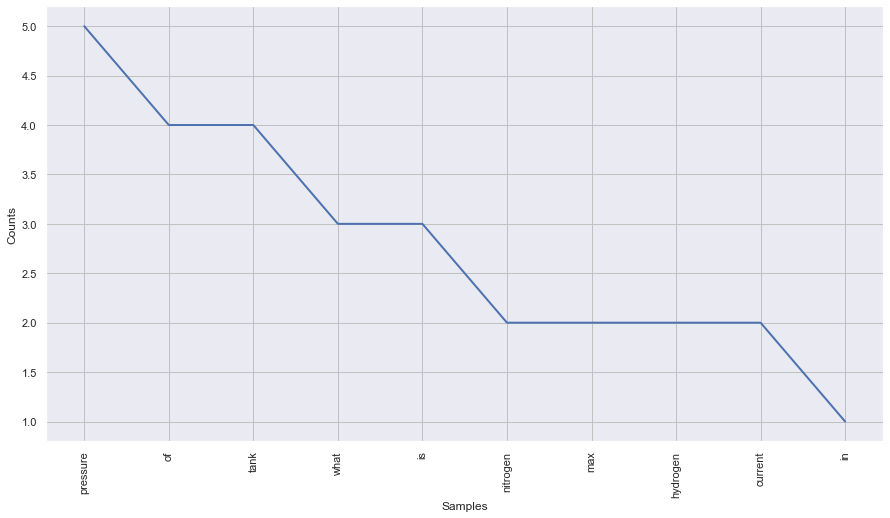

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [256]:
fdist.plot(10)

### List of stopwords

In [257]:
from nltk.corpus import stopwords

list_of_stopwords=stopwords.words("english")

print(list_of_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### Removing stopwords

In [258]:
clean_words=[w for w in words_no_punc if w not in list_of_stopwords]

print(clean_words)

print(len(clean_words))



['pressure', 'nitrogen', 'tank', 'max', 'pressure', 'hydrogen', 'tank', 'max', 'pressure', 'pump', 'current', 'pressure', 'nitrogen', 'tank', 'current', 'pressure', 'hydrogen', 'tank']
18


### Final frequency distribution

In [259]:
fdist=FreqDist(clean_words)

fdist.most_common(10)

[('pressure', 5),
 ('tank', 4),
 ('nitrogen', 2),
 ('max', 2),
 ('hydrogen', 2),
 ('current', 2),
 ('pump', 1)]

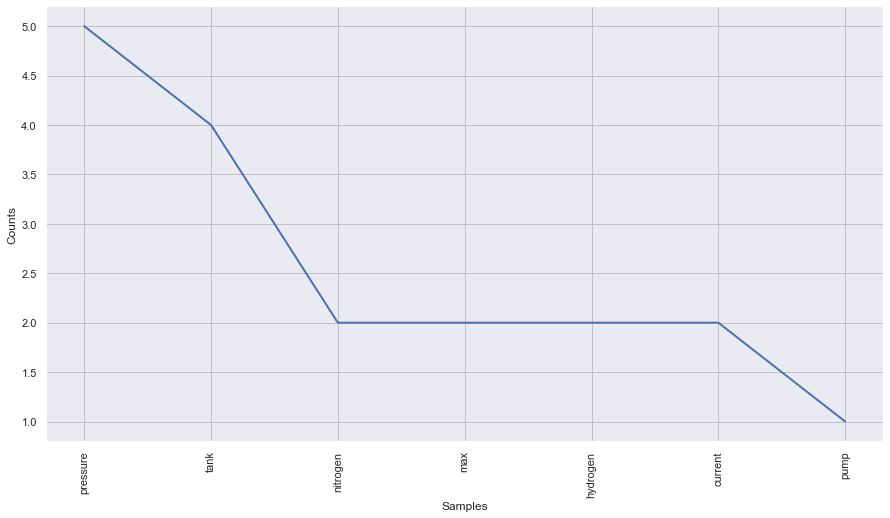

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [260]:
fdist.plot(10)

## Word Cloud

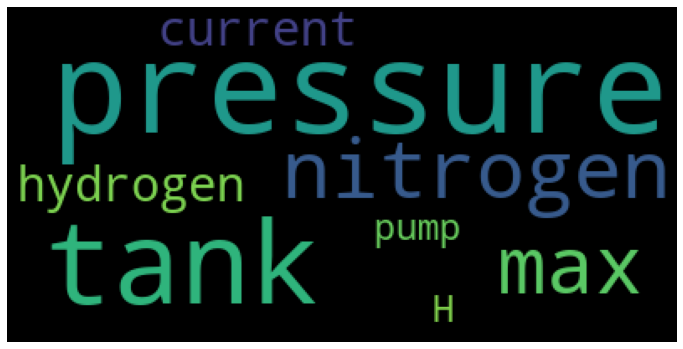

In [261]:
from wordcloud import WordCloud

wordcloud=WordCloud().generate(text)


plt.figure(figsize=(12,12))
plt.imshow(wordcloud)

plt.axis('off')
plt.show()

In [262]:
clean_words_joined=' '.join(clean_words)

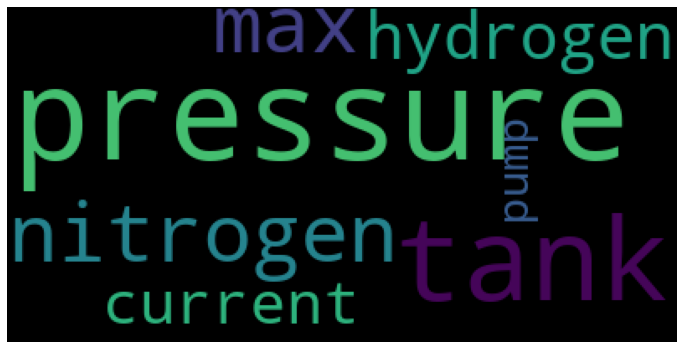

In [263]:
wordcloud=WordCloud().generate(clean_words_joined)


plt.figure(figsize=(12,12))
plt.imshow(wordcloud)

plt.axis('off')
plt.show()

In [264]:
wordcloud.words_

{'pressure': 1.0,
 'tank': 0.8,
 'nitrogen': 0.4,
 'max': 0.4,
 'hydrogen': 0.4,
 'current': 0.4,
 'pump': 0.2}

## Stemming

In [265]:
from nltk.stem import PorterStemmer

porter=PorterStemmer()

# word_list=['Programming','Programmers','Programmable','orbiter','electrical','studies','leaves','plays','am','is','were']
word_list=words

stemmed_words=[porter.stem(w) for w in word_list]

print(stemmed_words)

['what', 'is', 'pressur', 'of', 'nitrogen', 'tank', '?', 'what', 'is', 'max', 'pressur', 'in', 'the', 'hydrogen', 'tank', '?', 'what', 'is', 'max', 'pressur', 'of', 'pump', 'h-6', '?', 'current', 'pressur', 'of', 'nitrogen', 'tank', '.', 'current', 'pressur', 'of', 'hydrogen', 'tank', '.']


## Lemmatization

In [266]:
from nltk.stem import WordNetLemmatizer

lemmatizer=WordNetLemmatizer()

pos_list=['v','n','a','r']
print(f'word_list--->{word_list}')
for i in pos_list: 
    lemmatized_words=[lemmatizer.lemmatize(w,pos=i) for w in word_list]

    print(f' POS:{i}\n{lemmatized_words}')

word_list--->['what', 'is', 'pressure', 'of', 'nitrogen', 'tank', '?', 'what', 'is', 'max', 'pressure', 'in', 'the', 'hydrogen', 'tank', '?', 'what', 'is', 'max', 'pressure', 'of', 'pump', 'H-6', '?', 'current', 'pressure', 'of', 'nitrogen', 'tank', '.', 'current', 'pressure', 'of', 'hydrogen', 'tank', '.']
 POS:v
['what', 'be', 'pressure', 'of', 'nitrogen', 'tank', '?', 'what', 'be', 'max', 'pressure', 'in', 'the', 'hydrogen', 'tank', '?', 'what', 'be', 'max', 'pressure', 'of', 'pump', 'H-6', '?', 'current', 'pressure', 'of', 'nitrogen', 'tank', '.', 'current', 'pressure', 'of', 'hydrogen', 'tank', '.']
 POS:n
['what', 'is', 'pressure', 'of', 'nitrogen', 'tank', '?', 'what', 'is', 'max', 'pressure', 'in', 'the', 'hydrogen', 'tank', '?', 'what', 'is', 'max', 'pressure', 'of', 'pump', 'H-6', '?', 'current', 'pressure', 'of', 'nitrogen', 'tank', '.', 'current', 'pressure', 'of', 'hydrogen', 'tank', '.']
 POS:a
['what', 'is', 'pressure', 'of', 'nitrogen', 'tank', '?', 'what', 'is', 'max',

## Part of Speech Tagging (PoS tagging)

In [267]:
tagged_words=nltk.pos_tag(word_list)
print(tagged_words)

[('what', 'WP'), ('is', 'VBZ'), ('pressure', 'NN'), ('of', 'IN'), ('nitrogen', 'NN'), ('tank', 'NN'), ('?', '.'), ('what', 'WP'), ('is', 'VBZ'), ('max', 'JJ'), ('pressure', 'NN'), ('in', 'IN'), ('the', 'DT'), ('hydrogen', 'NN'), ('tank', 'NN'), ('?', '.'), ('what', 'WP'), ('is', 'VBZ'), ('max', 'JJ'), ('pressure', 'NN'), ('of', 'IN'), ('pump', 'NN'), ('H-6', 'NNP'), ('?', '.'), ('current', 'JJ'), ('pressure', 'NN'), ('of', 'IN'), ('nitrogen', 'NN'), ('tank', 'NN'), ('.', '.'), ('current', 'JJ'), ('pressure', 'NN'), ('of', 'IN'), ('hydrogen', 'NN'), ('tank', 'NN'), ('.', '.')]


In [268]:
# sentence='The three-person EO-3 crew docked with Salyut 7 on 9 February, 1984, and entered the darkened station carrying flashlights.'
# sentence=text

# tokenized_words=word_tokenize(sentence)

# tagged_words=nltk.pos_tag(tokenized_words)

# tagged_words

## Chunking

In [269]:
grammar="NP : {<DT>?<JJ>*<NN>} "

parser=nltk.RegexpParser(grammar)

output= parser.parse(tagged_words)

print(output)
# output.draw()

(S
  what/WP
  is/VBZ
  (NP pressure/NN)
  of/IN
  (NP nitrogen/NN)
  (NP tank/NN)
  ?/.
  what/WP
  is/VBZ
  (NP max/JJ pressure/NN)
  in/IN
  (NP the/DT hydrogen/NN)
  (NP tank/NN)
  ?/.
  what/WP
  is/VBZ
  (NP max/JJ pressure/NN)
  of/IN
  (NP pump/NN)
  H-6/NNP
  ?/.
  (NP current/JJ pressure/NN)
  of/IN
  (NP nitrogen/NN)
  (NP tank/NN)
  ./.
  (NP current/JJ pressure/NN)
  of/IN
  (NP hydrogen/NN)
  (NP tank/NN)
  ./.)


## Chinking

In [270]:
grammar=r"""NP : {<.*>+}
}<JJ>+{"""
parser=nltk.RegexpParser(grammar)

output= parser.parse(tagged_words)

print(output)
# output.draw()

(S
  (NP
    what/WP
    is/VBZ
    pressure/NN
    of/IN
    nitrogen/NN
    tank/NN
    ?/.
    what/WP
    is/VBZ)
  max/JJ
  (NP
    pressure/NN
    in/IN
    the/DT
    hydrogen/NN
    tank/NN
    ?/.
    what/WP
    is/VBZ)
  max/JJ
  (NP pressure/NN of/IN pump/NN H-6/NNP ?/.)
  current/JJ
  (NP pressure/NN of/IN nitrogen/NN tank/NN ./.)
  current/JJ
  (NP pressure/NN of/IN hydrogen/NN tank/NN ./.))


## Named Entity Recognition (NER)

In [271]:
sentence=text

tokenized_words=word_tokenize(sentence)

tagged_words=nltk.pos_tag(tokenized_words)
N_E_R=nltk.ne_chunk(tagged_words,binary=False)

print(N_E_R)

(S
  what/WP
  is/VBZ
  pressure/NN
  of/IN
  nitrogen/NN
  tank/NN
  ?/.
  what/WP
  is/VBZ
  max/JJ
  pressure/NN
  in/IN
  the/DT
  hydrogen/NN
  tank/NN
  ?/.
  what/WP
  is/VBZ
  max/JJ
  pressure/NN
  of/IN
  pump/NN
  H-6/NNP
  ?/.
  current/JJ
  pressure/NN
  of/IN
  nitrogen/NN
  tank/NN
  ./.
  current/JJ
  pressure/NN
  of/IN
  hydrogen/NN
  tank/NN
  ./.)


In [272]:
# N_E_R.draw()


## WordNet

In [273]:
from nltk.corpus import wordnet



In [274]:
for words in wordnet.synsets('Mars'):
    print(f'{words.name()}\n{words.definition()}\n{words.examples()}\n')

    for lemma in words.lemmas():
        print(lemma)
    print('\n')

mars.n.01
a small reddish planet that is the 4th from the sun and is periodically visible to the naked eye; minerals rich in iron cover its surface and are responsible for its characteristic color
['Mars has two satellites']

Lemma('mars.n.01.Mars')
Lemma('mars.n.01.Red_Planet')


mars.n.02
(Roman mythology) Roman god of war and agriculture; father of Romulus and Remus; counterpart of Greek Ares
[]

Lemma('mars.n.02.Mars')


march.n.01
the month following February and preceding April
[]

Lemma('march.n.01.March')
Lemma('march.n.01.Mar')


blemish.n.01
a mark or flaw that spoils the appearance of something (especially on a person's body)
['a facial blemish']

Lemma('blemish.n.01.blemish')
Lemma('blemish.n.01.defect')
Lemma('blemish.n.01.mar')


mar.v.01
make imperfect
['nothing marred her beauty']

Lemma('mar.v.01.mar')
Lemma('mar.v.01.impair')
Lemma('mar.v.01.spoil')
Lemma('mar.v.01.deflower')
Lemma('mar.v.01.vitiate')


mutilate.v.03
destroy or injure severely
['mutilated bodies']

Le

###  Hypernyms: Hypernyms gives us a more abstract term for a word.

In [275]:
word=wordnet.synsets('rocket')[0]

print(word.hypernyms())

[Synset('vehicle.n.01')]


### Hyponyms: Hyponyms gives us a more specific term for a word.

In [276]:
word=wordnet.synsets('rocket')[0]

print(word.hyponyms())

[Synset('missile.n.01'), Synset('multistage_rocket.n.01'), Synset('test_rocket.n.01')]


In [277]:
[word.hyponyms()[i].name() for i in range(len(word.hyponyms()))]

['missile.n.01', 'multistage_rocket.n.01', 'test_rocket.n.01']

### Get a name only

In [278]:
word=wordnet.synsets('rocket')[0]
print(word.lemmas()[0].name())

rocket


### Synonyms.

In [279]:
synonyms=[]

for words in wordnet.synsets('rocket'):
    for lemma in words.lemmas():
        synonyms.append(lemma.name())
synonyms

['rocket',
 'projectile',
 'rocket',
 'rocket_engine',
 'rocket',
 'roquette',
 'garden_rocket',
 'rocket_salad',
 'arugula',
 'Eruca_sativa',
 'Eruca_vesicaria_sativa',
 'rocket',
 'skyrocket',
 'skyrocket',
 'rocket',
 'rocket',
 'skyrocket',
 'rocket']

### Antonyms

In [280]:
antonyms=[]

for words in wordnet.synsets('Natural'):
    for lemma in words.lemmas():
        if lemma.antonyms():
            antonyms.append(lemma.antonyms()[0].name())
antonyms

['unnatural', 'artificial', 'supernatural', 'sharp']

### Synonyms and antonyms

In [281]:
synonyms=[]
antonyms=[]
for words in wordnet.synsets('Natural'):
    for lemma in words.lemmas():
        synonyms.append(lemma.name())
        if lemma.antonyms():
            antonyms.append(lemma.antonyms()[0].name())


print(f'synonyms:\n{synonyms}\n')
print(f'antonyms:\n{antonyms}\n')

synonyms:
['natural', 'natural', 'cancel', 'natural', 'natural', 'natural', 'natural', 'natural', 'natural', 'natural', 'instinctive', 'natural', 'raw', 'rude', 'natural', 'natural', 'born', 'innate', 'lifelike', 'natural']

antonyms:
['unnatural', 'artificial', 'supernatural', 'sharp']



###  Finding the similarity between words

In [282]:
word1=wordnet.synsets('ship','n')[0]

word2=wordnet.synsets('dog','n')[0]

word1.wup_similarity(word2)


0.4

# Bag-of-Words

In [283]:
# from collections import Counter

# text=text.lower()
# Counter(word_tokenize(text))

# Counter(text).most_common(2)
# Counter(word_tokenize(text)).most_common(2)

In [284]:
from sklearn.feature_extraction.text import CountVectorizer

# sentences=['Jim is a person', 'Jim likes to fly.', 'Jim wants to walk his dog.']

ngrams=1
cv=CountVectorizer(stop_words='english',ngram_range=(ngrams,ngrams))

B_O_W= cv.fit_transform(sentences).toarray()
sum_words = B_O_W.sum(axis=0)
words_freq = [(word, sum_words[idx]) for word, idx in cv.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1],reverse=True)


print(cv.vocabulary_)
print(cv.get_feature_names())
print(B_O_W)
print(f'BOW shape: {B_O_W.shape}')
print(sum_words)
print(words_freq)

{'pressure': 4, 'nitrogen': 3, 'tank': 6, 'max': 2, 'hydrogen': 1, 'pump': 5, 'current': 0}
['current', 'hydrogen', 'max', 'nitrogen', 'pressure', 'pump', 'tank']
[[0 0 0 1 1 0 1]
 [0 1 1 0 1 0 1]
 [0 0 1 0 1 1 0]
 [1 0 0 1 1 0 1]
 [1 1 0 0 1 0 1]]
BOW shape: (5, 7)
[2 2 2 2 5 1 4]
[('pressure', 5), ('tank', 4), ('nitrogen', 2), ('max', 2), ('hydrogen', 2), ('current', 2), ('pump', 1)]


c:\Users\dowdj\OneDrive\Documents\GitHub\NLP-Training\nltk\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [285]:
n=20
top_words = words_freq[0:n]
top_df = pd.DataFrame(top_words)
top_df.columns=["Word", "Freq"]

top_df.head()

,Word,Freq
0,pressure,5
1,tank,4
2,nitrogen,2
3,max,2
4,hydrogen,2


[Text(0, 0, 'pressure'),
 Text(1, 0, 'tank'),
 Text(2, 0, 'nitrogen'),
 Text(3, 0, 'max'),
 Text(4, 0, 'hydrogen'),
 Text(5, 0, 'current'),
 Text(6, 0, 'pump')]

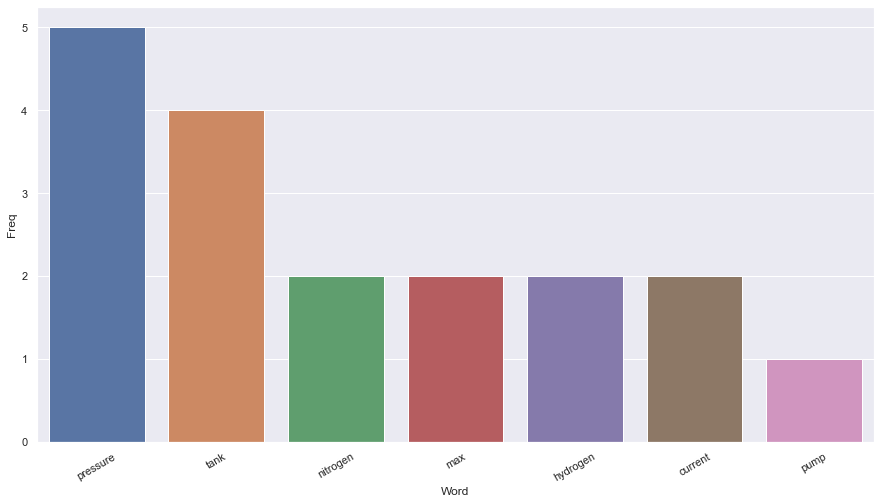

In [286]:
sns.set(rc={'figure.figsize':(15,8)})
g = sns.barplot(x="Word", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

In [287]:
sentence=text

tokenized_words=word_tokenize(sentence)

tagged_words=nltk.pos_tag(tokenized_words)



tagged_words

[('what', 'WP'),
 ('is', 'VBZ'),
 ('pressure', 'NN'),
 ('of', 'IN'),
 ('nitrogen', 'NN'),
 ('tank', 'NN'),
 ('?', '.'),
 ('what', 'WP'),
 ('is', 'VBZ'),
 ('max', 'JJ'),
 ('pressure', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('hydrogen', 'NN'),
 ('tank', 'NN'),
 ('?', '.'),
 ('what', 'WP'),
 ('is', 'VBZ'),
 ('max', 'JJ'),
 ('pressure', 'NN'),
 ('of', 'IN'),
 ('pump', 'NN'),
 ('H-6', 'NNP'),
 ('?', '.'),
 ('current', 'JJ'),
 ('pressure', 'NN'),
 ('of', 'IN'),
 ('nitrogen', 'NN'),
 ('tank', 'NN'),
 ('.', '.'),
 ('current', 'JJ'),
 ('pressure', 'NN'),
 ('of', 'IN'),
 ('hydrogen', 'NN'),
 ('tank', 'NN'),
 ('.', '.')]

## TF-IDF

In [288]:
# num_of_words=sum(sum_words.tolist())
# num_of_words


# doc_words=cv.get_feature_names_out()

# freq=[round((i/4),3) for i in sum_words]

# len(doc_words)
# print(f'features: {doc_words}\nword counts: {sum_words}\nword frequency: {freq}')
# N=2
# num_docs_contain_word=1
# freq[0]*math.log(N/num_docs_contain_word)

In [289]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer=TfidfVectorizer(norm='l2',stop_words='english')

X=vectorizer.fit_transform(sentences).toarray()

print(vectorizer.vocabulary_)
print(vectorizer.get_feature_names())
print(X)

{'pressure': 4, 'nitrogen': 3, 'tank': 6, 'max': 2, 'hydrogen': 1, 'pump': 5, 'current': 0}
['current', 'hydrogen', 'max', 'nitrogen', 'pressure', 'pump', 'tank']
[[0.         0.         0.         0.73792244 0.43582888 0.
  0.51528988]
 [0.         0.59376229 0.59376229 0.         0.35068557 0.
  0.41462311]
 [0.         0.         0.58873218 0.         0.34771471 0.72971837
  0.        ]
 [0.59376229 0.         0.         0.59376229 0.35068557 0.
  0.41462311]
 [0.59376229 0.59376229 0.         0.         0.35068557 0.
  0.41462311]]


c:\Users\dowdj\OneDrive\Documents\GitHub\NLP-Training\nltk\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [290]:
X.shape

(5, 7)

## Sidebar